# 3주차: 열역학 제1법칙

## 1. 열역학 제1법칙 소개

### 에너지 보존의 법칙

### $ \Delta U = q + W $
- $ \Delta U $ : 내부에너지 변화
- $ q $ = 열
- $ W $ = 일
- 내부에너지는 온도에 의해서만 결정됨
- 단원자분자 이상기체의 경우, 내부 에너지 변화 $ \Delta U = \frac{3}{2}nR\Delta T $

### $ W = F \Delta S = P \Delta V $
- P-V(압력-부피)그래프에서 P 그래프의 아래 면적 --> 일(W)

### 열
#### 열용량 = 온도1도 올리는데 필요한 열 = $C$ = $\frac{q}{\Delta T}$
  
1. 단원자분자 이상기체에서 일정한 부피 ($\Delta V = 0$)  
$ q_{V} = n C_{V} \Delta T$  
$ W = P \Delta V = 0 $ (부피변화가 없으므로 일=0)  
$ \Delta U = q_{V} $  
$ \frac{3}{2}nR\Delta T = n C_{V} \Delta T $  
$ \therefore C_{V} = \frac{3}{2} R $
  
2. 단원자분자 이상기체에서 일정한 압력
$ q_{V} = n C_{P} \Delta T$  
$ q_{P} = \Delta U + P \Delta V =  q_{V} +P \Delta V $  
$ = n C_{V} \Delta T + nR\Delta T $  
$ = n(C_{V} + R) \Delta T $
$ = n C_{P} \Delta T $  
$ C_{P} = C_{V} + R $  
$ \therefore C_{P} = \frac{3}{2}R + R = \frac{5}{2}R $

### 일

#### 1. 등온팽창일 경우(온도 일정 <-- 에너지 유입/출)

$ W = -P \Delta V = - \int_{V_1}^{V_2}P dV = - \int_{V_1}^{V_2} \frac{nRT}{V} dV $  
$ = -nRT \int_{V_1}^{V_2} \frac{1}{V} dV = -nRT ln \frac{V2}{V1}$

#### 2. 단열팽창일 경우(열의 교환X <-- 에너지 유입/출 X, q=0)
$ \Delta u = W \because q = 0 $  
$ n C_{V} \Delta T = - P \Delta V = - \frac{nRT}{V} \Delta V $  

미분하기 위해 형태 변환  
$ n C_{V} dT = - \frac{nRT}{V} dV $  
$ C_{V} \frac{dT}{T} = - \frac{R}{V} dV $

양 변 적분  
$ \int_{T_1}^{T_2} C_{V} \frac{dT}{T} = - \int_{V_1}^{V_2} \frac{R}{V} dV $  
$ C_V ln \frac{T_2}{T_1} = -R ln \frac{V_2}{V_1} $  
$ (\frac{T_2}{T_1})^{C_V} = (\frac{V_1}{V_2})^R = (\frac{V_1}{V_2})^{C_P-C_V} \because C_P = C_V + R $  

양변에 $1/C_V$ 승을 취함  
$ (\frac{T_2}{T_1}) = (\frac{V_1}{V_2})^{\gamma -1} $ <-- ($\gamma = \frac{C_P}{C_V}$)  
$ T_1 V_{1}^{\gamma -1} = T_2 V_{2}^{\gamma -1} $  
$ P_1 V_{1}^{\gamma} = P_2 V_{2}^{\gamma} \because T= \frac{PV}{nR}$

## 2. 부피-압력 그래프 그리기

In [1]:
# scipy 적분하기
from scipy.integrate import quad 

def sample_function(x,a,b):  # 임의의 함수
    return a*x**2 + b

a=2
b=1
I = quad(sample_function,0,1,args=(a,b))
print(I)

(1.6666666666666667, 1.8503717077085944e-14)


(0.9999999999999997, 1.0178191437091558e-08)


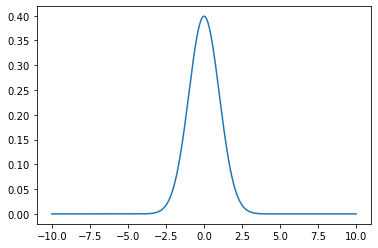

In [10]:
# scipy적분은 무한대 적분도 당연히 가능함
import numpy as np
from scipy.integrate import quad 

def gaussian(x,a):  # 가우시안함수
    return 1/a/np.sqrt(2*np.pi)*np.exp(-x**2/2/a**2)

a=1
I=quad(gaussian, -np.inf, np.inf,args=a)
print(I)


import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.01)
plt.plot(x, gaussian(x,a))
plt.show()

## 3. 부피-압력 그래프 적분하기

$ P = \frac{nRT}{V} $

### 1) 등온조건의 경우

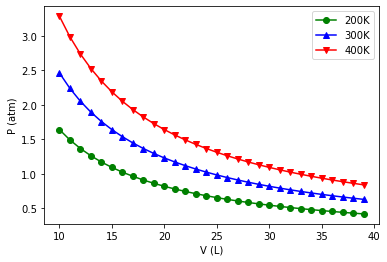

In [12]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

R = 0.08205  # in L atm /(K mol)

def P(V, n, T):
    return n*R*T/V

V = np.arange(10,40,1)
n = 1
T1 = 200
T2 = 300
T3 = 400

plt.plot(V,P(V,n, T1), 'go-', label = '200K')
plt.plot(V,P(V,n, T2), 'b^-', label = '300K')
plt.plot(V,P(V,n, T3), 'rv-', label = '400K')

plt.legend()
plt.xlabel('V (L)')
plt.ylabel('P (atm)')
plt.show()

10L -> 40L 로 이동하는 동안 시스템(계)에서 하는 일(W)  
$ W = -P \Delta V = - \int_{10}^{40}P dV = - \int_{10}^{40} \frac{nRT}{V} dV $ 

In [19]:
# 10L -> 40L 로 이동하는 동안 시스템(계)에서 하는 일(W)

V1 = 10
V2 = 40

w_t1 = -quad(P,V1,V2, args=(n,T1))[0]
w_t2 = -quad(P,V1,V2, args=(n,T2))[0]
w_t3 = -quad(P,V1,V2, args=(n,T3))[0]

print('w_t1 =',w_t1)
print('w_t2 =',w_t2)
print('w_t3 =',w_t3)

w_t1 = -22.749090465977407
w_t2 = -34.12363569896611
w_t3 = -45.49818093195481


이때, 등온팽창은 $\Delta U = 0$이므로  
$ \Delta U = q + W = 0 $  
$ \therefore q = -W $

In [20]:
q_t1 = -w_t1
q_t2 = -w_t2
q_t3 = -w_t3

print('q at 200K = ', q_t1)
print('q at 300K = ', q_t2)
print('q at 400K = ', q_t3)

q at 200K =  22.749090465977407
q at 300K =  34.12363569896611
q at 400K =  45.49818093195481


### 1) 단열조건의 경우
$ P_1 V_1^\gamma = P_2 V_2^\gamma $  
$ \gamma = c_p / c_V $

$ \therefore P = P_1 \left(\frac{V_1}{V}\right)^\gamma $

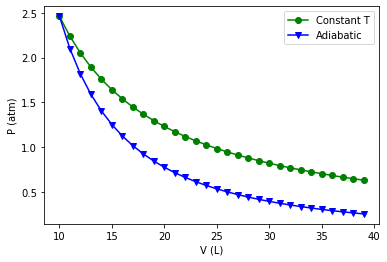

In [23]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

R = 0.08205  # in L atm /(K mol)
gamma = 5/3  # in monatomic ideal gas

def P_consT(V, P1, V1):  # 등온
    return P1*(V1/V)

def P_adiab(V, P1, V1):  # 단열
    return P1*(V1/V)**gamma


V = np.arange(10,40,1)
n = 1
T = 300

V1 = 10
P1 = n*R*T/V1

plt.plot(V,P_consT(V, P1, V1), 'go-', label = 'Constant T')
plt.plot(V,P_adiab(V, P1, V1), 'bv-', label = 'Adiabatic')

plt.legend()
plt.xlabel('V (L)')
plt.ylabel('P (atm)')
plt.show()

10L -> 40L 로 이동하는 동안 시스템(계)에서 하는 일(W)  
$ W = -P \Delta V = - \int_{10}^{40}P dV = - \int_{10}^{40} P_1 \left( \frac{V_1}{V} \right)^\gamma dV $ 

In [27]:
V1 = 10
V2 = 40

w_consT = -quad(P_consT,V1,V2, args=(P1,V1))[0]
w_adiab = -quad(P_adiab,V1,V2, args=(P1,V1))[0]

print('w_consT =',w_consT)
print('w_adiab =',w_adiab)

w_consT = -34.12363569896611
w_adiab = -22.269796164676038


이때, 단열팽창은 $ q = 0 $ 이므로  
$ \Delta U = q + W = 0 + W $  
$ \therefore \Delta U = W$ 

In [28]:
dU = w_adiab
print('dU =', dU)

dU = -22.269796164676038
